<a href="https://colab.research.google.com/github/6058ah/6058ah/blob/main/%EC%BA%90%EA%B8%80_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%94%B0%EB%9D%BC%ED%95%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#1. 데이터 불러오기

In [ ]:
#캐글과 구글 콜랩 연동해서 데이터 불러오기
!pip install kaggle

In [5]:
#kaggle account에서 create new api token을 통해 받은 kaggle.json을 업로드
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nimijah","key":"b8d2dc528414dd8c743a0df69e38576b"}'}

In [9]:
#kaggle폴더를 만들고 해당 폴더에 kaggle.json 파일 복사
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

#permission warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
#kaggle 경진 대회 목록
!kaggle competitions list

ref                                              deadline             category            reward  teamCount  userHasEntered  
-----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                     2030-07-01 23:59:00  Getting Started     Prizes         53           False  
gan-getting-started                              2030-07-01 23:59:00  Getting Started     Prizes         88           False  
store-sales-time-series-forecasting              2030-06-30 23:59:00  Getting Started  Knowledge       1251           False  
tpu-getting-started                              2030-06-03 23:59:00  Getting Started  Knowledge        141           False  
digit-recognizer                                 2030-01-01 00:00:00  Getting Started  Knowledge       1918           False  
titanic                                          2030-01-01 00:00:00  Getting Started  Knowledge      14558           

In [11]:
#타이타닉 데이터 다운로드
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 25.2MB/s]


In [12]:
#데이터 불러오기
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#2. 데이터 분석 및 시각화

In [13]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
#index는 각 승객의 고유 번호, 생존 여부, 객실 등급, 이름, 성별, 나이, 동반한 배우자와 형재자매 수, 동반한 부모와 자식 수, 티켓 고유번호, 티켓 요금, 겍실 번호, 승선한 항이 존재
#생존 여부는 0=사망, 1=생존
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [15]:
#변수 별 자료형 및 개수
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
753,754,0,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S


In [17]:
#각 변수별 null값 개수
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


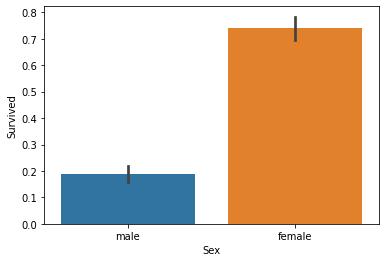

In [18]:
#성별에 따른 생존율 비교

sns.barplot(x="Sex", y="Survived", data=train)

print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

#여성의 생존율이 남성보다 더 높음

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


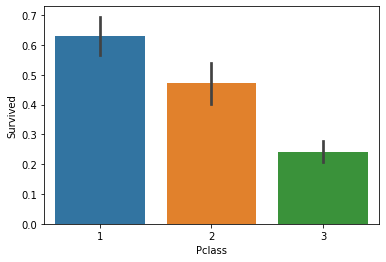

In [19]:
#객실 등급에 따른 생존율

sns.barplot(x="Pclass", y="Survived", data=train)

print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

#객실 등급이 높을수록 생존율이 올라가는 것을 확인 가능

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


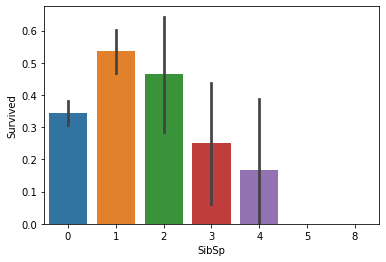

In [20]:
#형재자매나 배우자 수에 따른 생존율

sns.barplot(x="SibSp", y="Survived", data=train)

print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

#일반적으론 많은 형제나 배우자와 함께한 사람들은 살아남은 확률이 낮음. 그러나 혼자 여행한 사람들은 1명 혹은 2명과 함께한 사람보다 살아남을 확률이 낮음.

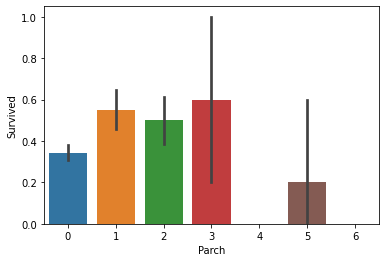

In [21]:
#부모 자식 수에 따른 생존율
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()
#부모나 자식들이 4명보다 적은 사람들은 4명 이상인 사람들보다 살아남은 확률이 높음

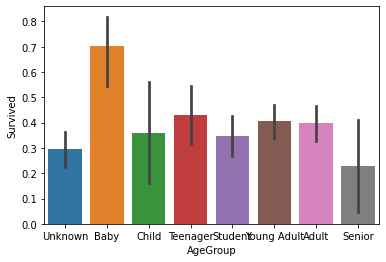

In [22]:
#연령별 생존율
#나이별 그룹을 나누어 생존율을 확인
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

#아기들이 다른 나이대 사람들보다 생존율이 높음

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


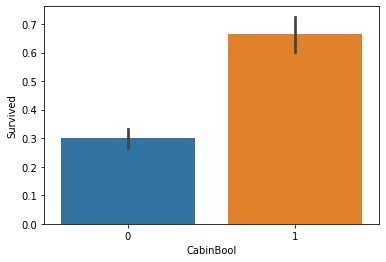

In [32]:
#객실번호 유무에 따른 생존율
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))


print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

#객실 번호가 기록된 사람들의 생존율이 높음

Percentage of Cherbourg who survived: 55.35714285714286
Percentage of Queenstown who survived: 38.961038961038966
Percentage of Southampton who survived: 33.69565217391305


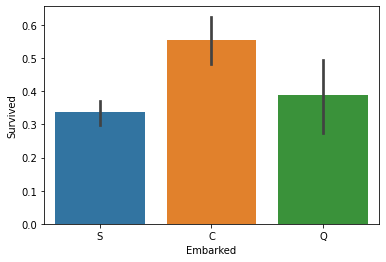

In [34]:
#승선한 항에 따른 생존율
sns.barplot(x="Embarked", y="Survived", data=train)

print("Percentage of Cherbourg who survived:", train["Survived"][train["Embarked"] == "C"].value_counts(normalize = True)[1]*100)

print("Percentage of Queenstown who survived:", train["Survived"][train["Embarked"] == "Q"].value_counts(normalize = True)[1]*100)

print("Percentage of Southampton who survived:", train["Survived"][train["Embarked"] == "S"].value_counts(normalize = True)[1]*100)

#Cherbourg, Queenstown, Southampton 순으로 생존율이 높음.